In [1]:
from google.colab import drive
ROOT = "/content/gdrive"
drive.mount(ROOT, force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
!ls '/content/gdrive/My Drive/Colab_Notebooks/my_project1/deep_learning/S15_A'

 DatasetPrep_S13.ipynb		   dense_depth_sajna.ipynb
 data_stastics_calculation.ipynb   depth_mask_images
 data_stastics.ipynb		   draft
 DenseDepth			   foreground_backup
 DenseDepth1			   images
'dense_depth_sajna (4).ipynb'	   test_folder


In [2]:
import os
basePath = '/content/gdrive/My Drive/Colab_Notebooks/my_project1/deep_learning/S15_A/'
os.chdir(basePath)

In [3]:
import numpy as np
import cv2
import io
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import ToTensor
import zipfile
import matplotlib.pyplot as plt
import torchvision
from PIL import Image
import glob
import torch
from tqdm import tqdm

class ZipDataset(Dataset):
    def __init__(self, zip_path):
        f = open(zip_path, 'rb')
        self.zip_content = f.read()
        f.close()
        self.zip_handle = zipfile.ZipFile(io.BytesIO(self.zip_content), 'r')
        self.name_list = self.zip_handle.namelist()

    def __getitem__(self, key):
        buf = self.zip_handle.read(self.name_list[key])
        dataEnc = io.BytesIO(buf)
        images= np.array(Image.open(dataEnc ), dtype=float)
        return images

    def __len__(self):
        return len(self.name_list)


In [4]:
class CustomDataset(Dataset):
    def __init__(self, image_list):
        self.image_list = image_list

    def __getitem__(self, key):
        images = np.array(Image.open(self.image_list[key]))
        return images

    def __len__(self):
        return len(self.image_list)

In [5]:
def plot_images_horizontally(images):
    fig = plt.figure(figsize=(50, 40))
    num_imgs = images.shape[0]
    for i in range(num_imgs):
        fig.add_subplot(1, num_imgs, i + 1)
        img = images[i]
        npimg = img.numpy()
        if npimg.ndim == 2:
            plt.gray()
        plt.imshow(npimg)
        plt.axis('off')

In [21]:
def plot_from_zip_path(zip_list):
  for zip_file in zip_list:
    dataset = ZipDataset(zip_file)
    dataloader = DataLoader(dataset, batch_size=10, num_workers=1, shuffle=True)
    images = next(iter(dataloader))
    plot_images_horizontally(images/255.)

In [17]:
def plot_from_images_path(image_list):
  dataset = CustomDataset(image_list)
  dataloader = DataLoader(dataset, batch_size=10, num_workers=1, shuffle=True)
  images = next(iter(dataloader))
  plot_images_horizontally(images/255.)

## **Background visualization**

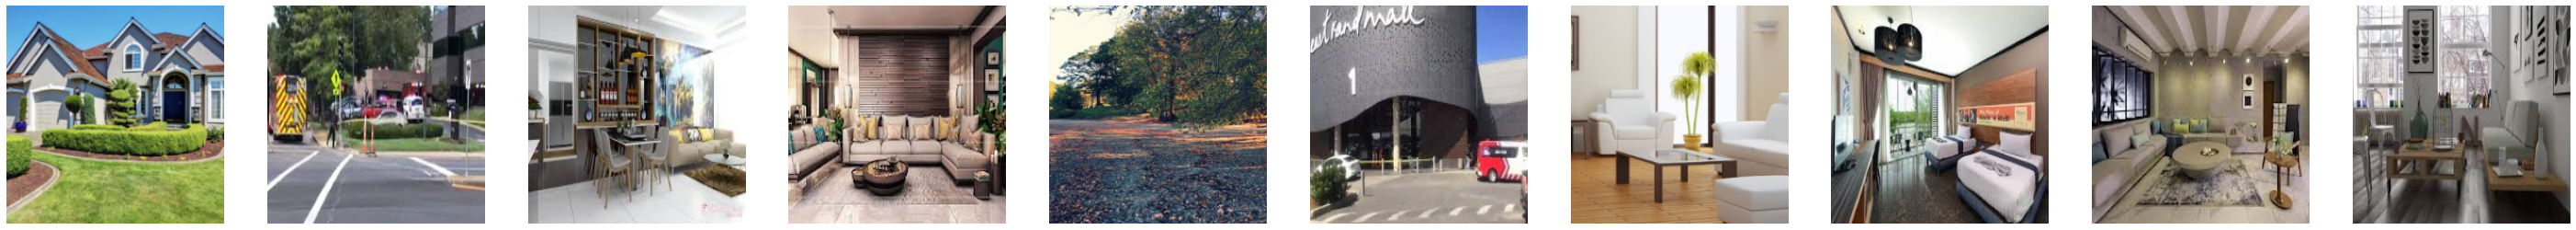

In [19]:
image_list = sorted([f for f in glob.glob('/content/gdrive/My Drive/Colab_Notebooks/my_project1/deep_learning/S15_A/images/background/*.jpg')])
plot_from_images_path(image_list)

## **Foreground visualization**

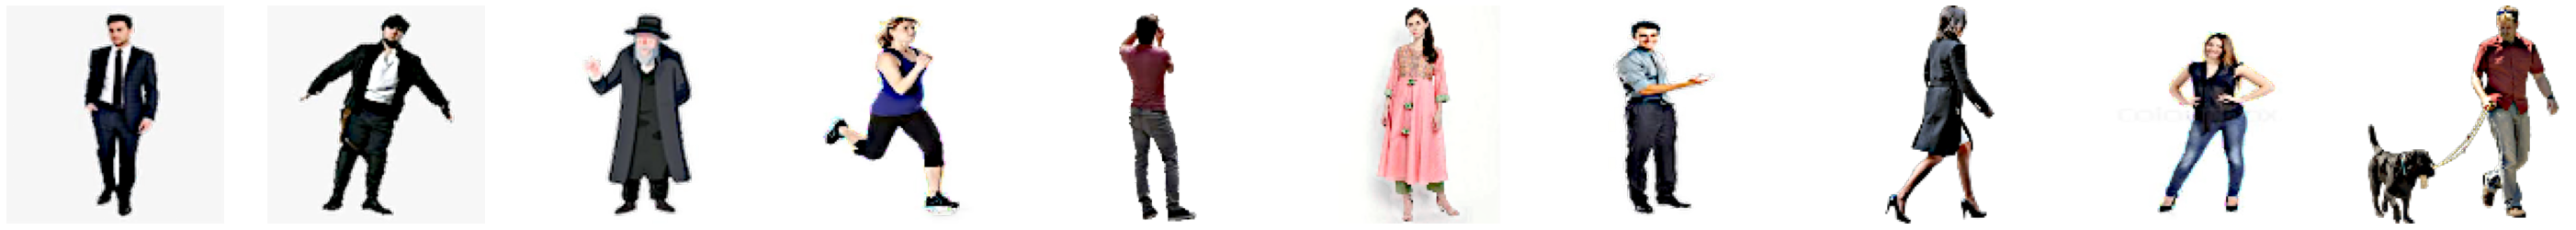

In [15]:
image_list = sorted([f for f in glob.glob('/content/gdrive/My Drive/Colab_Notebooks/my_project1/deep_learning/S15_A/images/foreground/*.png')])
plot_from_images_path(image_list)

##**FG MASK visualization**

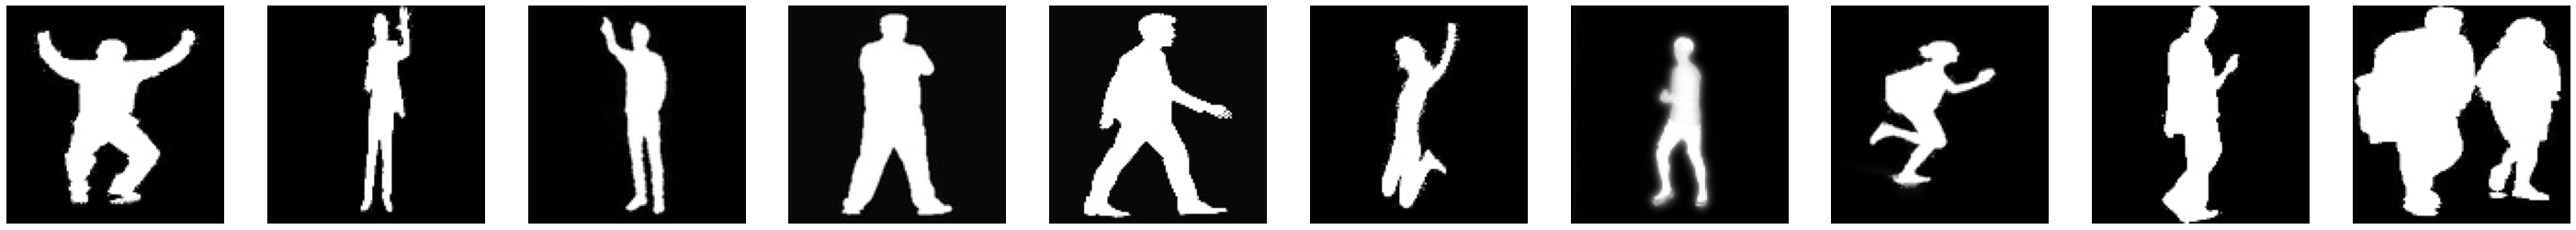

In [16]:
image_list = sorted([f for f in glob.glob('/content/gdrive/My Drive/Colab_Notebooks/my_project1/deep_learning/S15_A/images/fg_mask/*.jpg')])
plot_from_images_path(image_list)

## **FG BG Visualization**

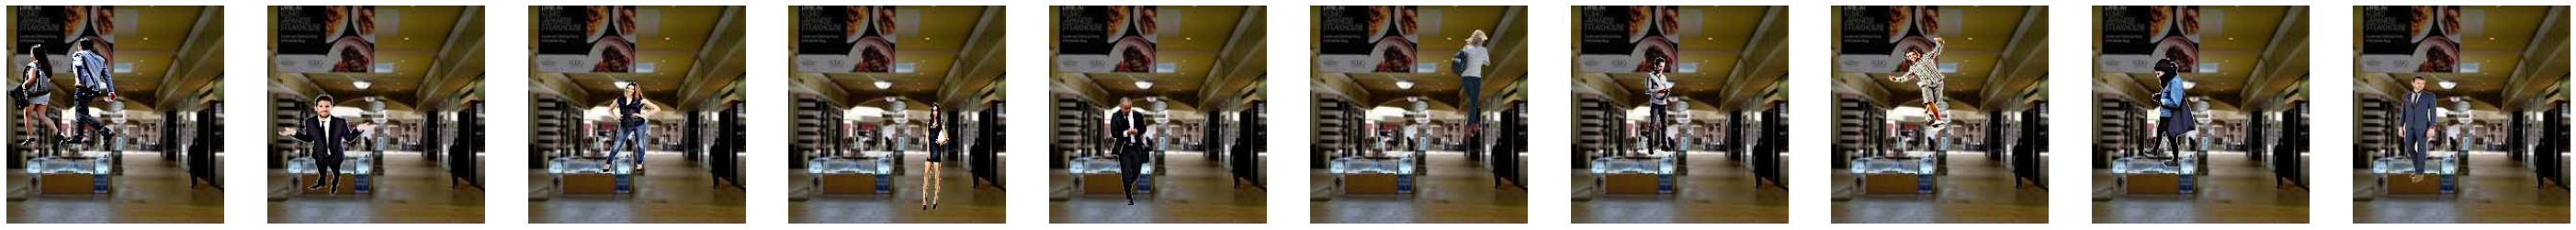

In [22]:
zip_list = sorted([f for f in glob.glob('/content/gdrive/My Drive/Colab_Notebooks/my_project1/deep_learning/S15_A/images/fg_bg/*.zip')])[1:2]
plot_from_zip_path(zip_list)

## **FG BG Mask Visualization**

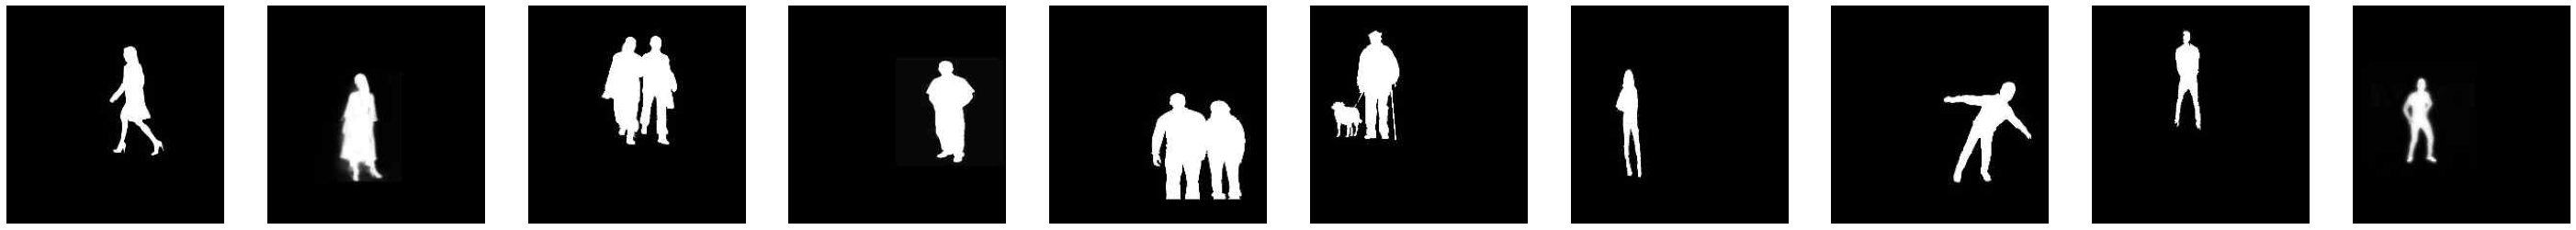

In [23]:
zip_list = sorted([f for f in glob.glob('/content/gdrive/My Drive/Colab_Notebooks/my_project1/deep_learning/S15_A/images/fg_bg_mask/*.zip')])[1:2]
plot_from_zip_path(zip_list)

## **Dense Depth visualization**

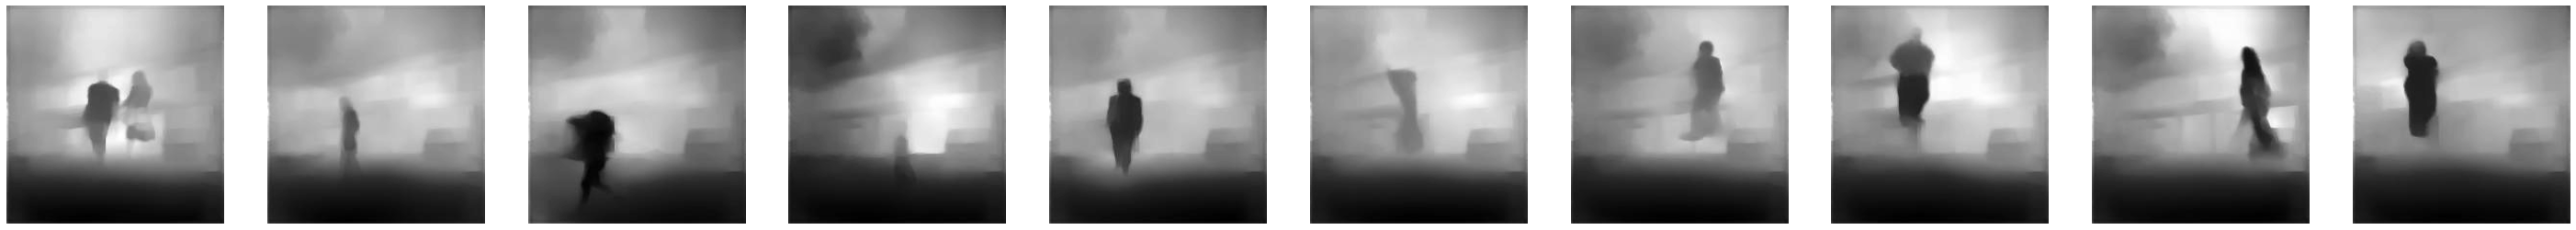

In [25]:
zip_list = sorted([f for f in glob.glob('/content/gdrive/My Drive/Colab_Notebooks/my_project1/deep_learning/S15_A/images/dense_depth/*.zip')])[2:3]
plot_from_zip_path(zip_list)